## Introduction

Wine!

Our data is the result of chemical analyses performed on wines grown in the same region of Italy from three different types of grapes.  13 different attributes have been recorded for each of 178 wines, ranging from alcohol content and color intensity to the content of chemicals such as phenols, OD280/OD315 (protein indicators) and praline.

Our goal is to classify an unknown wine as either Class 0, 1, or 2 using the K-Nearest Neighbors algorithm.  To do this, we first engineer features by adding columns to represent the squares and cross-terms of each of the given features.  Then we scale the values of each feature to be between 0 and 1.  After this, we randomly separate the data into a training set and a test set.  Then, on the training set, we run the Principle Component Analysis (PCA).  We find that the "knee" seems to be between 4 and 5 components, so we run our algorithm using 4 components as well as more than 4 (for cross-validation!).  We also use only 2 components, as there is a large difference between 2 and 3 components as well, and it produces pretty plots.  Then, we use the K-Nearest Neighbors algorithm with different values of K.  Using cross-validation, it seems that the best testing scores occur when K is between 7 and 9.

<img src="http://cdn-media-2.lifehack.org/wp-content/files/2016/08/15125659/best-wine-background_original.jpg" style="width:300px">

Below is an aesthetically pleasing movie about wine tasting.



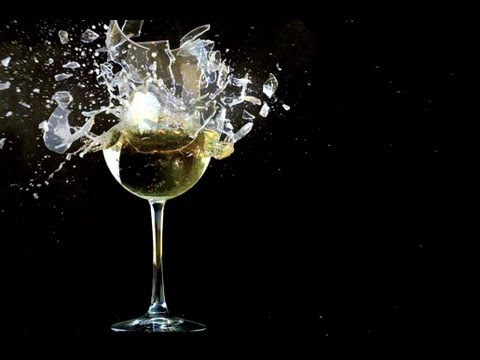

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('O4zeyuk8hL8')

Your data description

In [2]:
#dataPath = 'UCIMLR/BreastCancer/breastcancer'
#dataPath = 'UCIMLR/Iris/iris'
#dataPath = 'UCIMLR/Parkinsons/parkinsons'
dataPath = 'UCIMLR/Wine/wine'

In [3]:
print(open(dataPath+'.txt', 'r').read())

1. Title of Database: Wine recognition data
	Updated Sept 21, 1998 by C.Blake : Added attribute information

2. Sources:
   (a) Forina, M. et al, PARVUS - An Extendible Package for Data
       Exploration, Classification and Correlation. Institute of Pharmaceutical
       and Food Analysis and Technologies, Via Brigata Salerno, 
       16147 Genoa, Italy.

   (b) Stefan Aeberhard, email: stefan@coral.cs.jcu.edu.au
   (c) July 1991
3. Past Usage:

   (1)
   S. Aeberhard, D. Coomans and O. de Vel,
   Comparison of Classifiers in High Dimensional Settings,
   Tech. Rep. no. 92-02, (1992), Dept. of Computer Science and Dept. of
   Mathematics and Statistics, James Cook University of North Queensland.
   (Also submitted to Technometrics).

   The data was used with many others for comparing various 
   classifiers. The classes are separable, though only RDA 
   has achieved 100% correct classification.
   (RDA : 100%, QDA 99.4%, LDA 98.9%, 1NN 96.1% (z-transformed data))
   (All results usi

# Loading in the libraries.

In [4]:
# Old libraries that we know and love.
import numpy as np
import pandas as pa
import sklearn
import matplotlib.pylab as py
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

%matplotlib inline

# Preliminaries

Read in the data

In [5]:
data = pa.read_csv(dataPath+'.csv')

The size of our data was 

In [6]:
data.shape

(178, 14)

One measurement

In [7]:
data.iloc[0,:]

Alchohol                          14.23
Malic Acid                         1.71
Ash                                2.43
Alcalinity of ash                 15.60
Magnesium                        127.00
Total Phenols                      2.80
Flavinoids                         3.06
Nonflavanoid phenols               0.28
Proanthocyanins                    2.29
Color intensity                    5.64
Hue                                1.04
OD280/OD315 of diluted wines       3.92
Proline                         1065.00
Wine Class                         0.00
Name: 0, dtype: float64

Column 0 - Alcohol - A percentage

Column 1 - Malic Acid - organic acid whose concentration depends on grape variety and soil content

Column 2 - Ash - its content is one of most important indicators in wine quality determination

Column 3 - Alkalinity of Ash - measures basicity (alkalinity) of ash

Column 4 - Magnesium - roughly 16 mg in a 5 oz serving

Column 5 - Total Phenols - natural phenols split into flavonoids and non-flavonoids, red wine seems to have more phenols

Column 6 - Flavonoids - type of phenol that contributes to color and mouthfeel of wine

Column 7 - Non-flavonoid phenols - include stilbenoids and phenolic acid

Column 8 - Proanthocyanidins - condensed tannins that are one of most important molecules that contribute to taste and color

Column 9 - Color intensity - observed by wine's opacity, deeply opaque reds have more phenolics

Column 10 - Hue - observe by looking at edge of wine as it hits glass

Column 11 - OD280/OD315 of diluted wines - part of chemical process used to classify, protein indicator (optical distance of protein)

Column 12 - Proline - amino acid

# Looking at the data

In [8]:
X = np.array(data.iloc[:, :-1])
y = np.array(data.iloc[:, -1])

In [9]:
print(y)
print(X)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
[[  1.42300000e+01   1.71000000e+00   2.43000000e+00 ...,   1.04000000e+00
    3.92000000e+00   1.06500000e+03]
 [  1.32000000e+01   1.78000000e+00   2.14000000e+00 ...,   1.05000000e+00
    3.40000000e+00   1.05000000e+03]
 [  1.31600000e+01   2.36000000e+00   2.67000000e+00 ...,   1.03000000e+00
    3.17000000e+00   1.18500000e+03]
 ..., 
 [  1.32700000e+01   4.28000000e+00   2.26000000e+00 ...,   5.90000000e-01
    1.56000000e+00   8.35000000e+02]
 [  1.31700000e+01   2.59000000e+00   2.37000000e+00 ...,   6.00000000e-01
    1.62000000e+00   8.40000000e+02]
 [  1.41300000e+01   4.10000000e+00   2.74000000e+00 ...,   6.10000000e

In [10]:
def plotthemall1(a,b):
    return py.plot(X[y==0,a],X[y==0,b],'r.') 
def plotthemall2(a,b):
    return py.plot(X[y==1,a],X[y==1,b],'g.') 
def plotthemall3(a,b):
    return py.plot(X[y==2,a],X[y==2,b],'b.')

In [11]:
def puttogether(a,b):
    c = plotthemall1(a,b)
    d = plotthemall2(a,b)
    e = plotthemall3(a,b)
    return c,d,e

([<matplotlib.lines.Line2D at 0xa875cf8>],
 [<matplotlib.lines.Line2D at 0xa887898>])

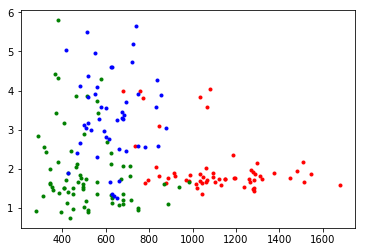

In [12]:
puttogether(12,1)


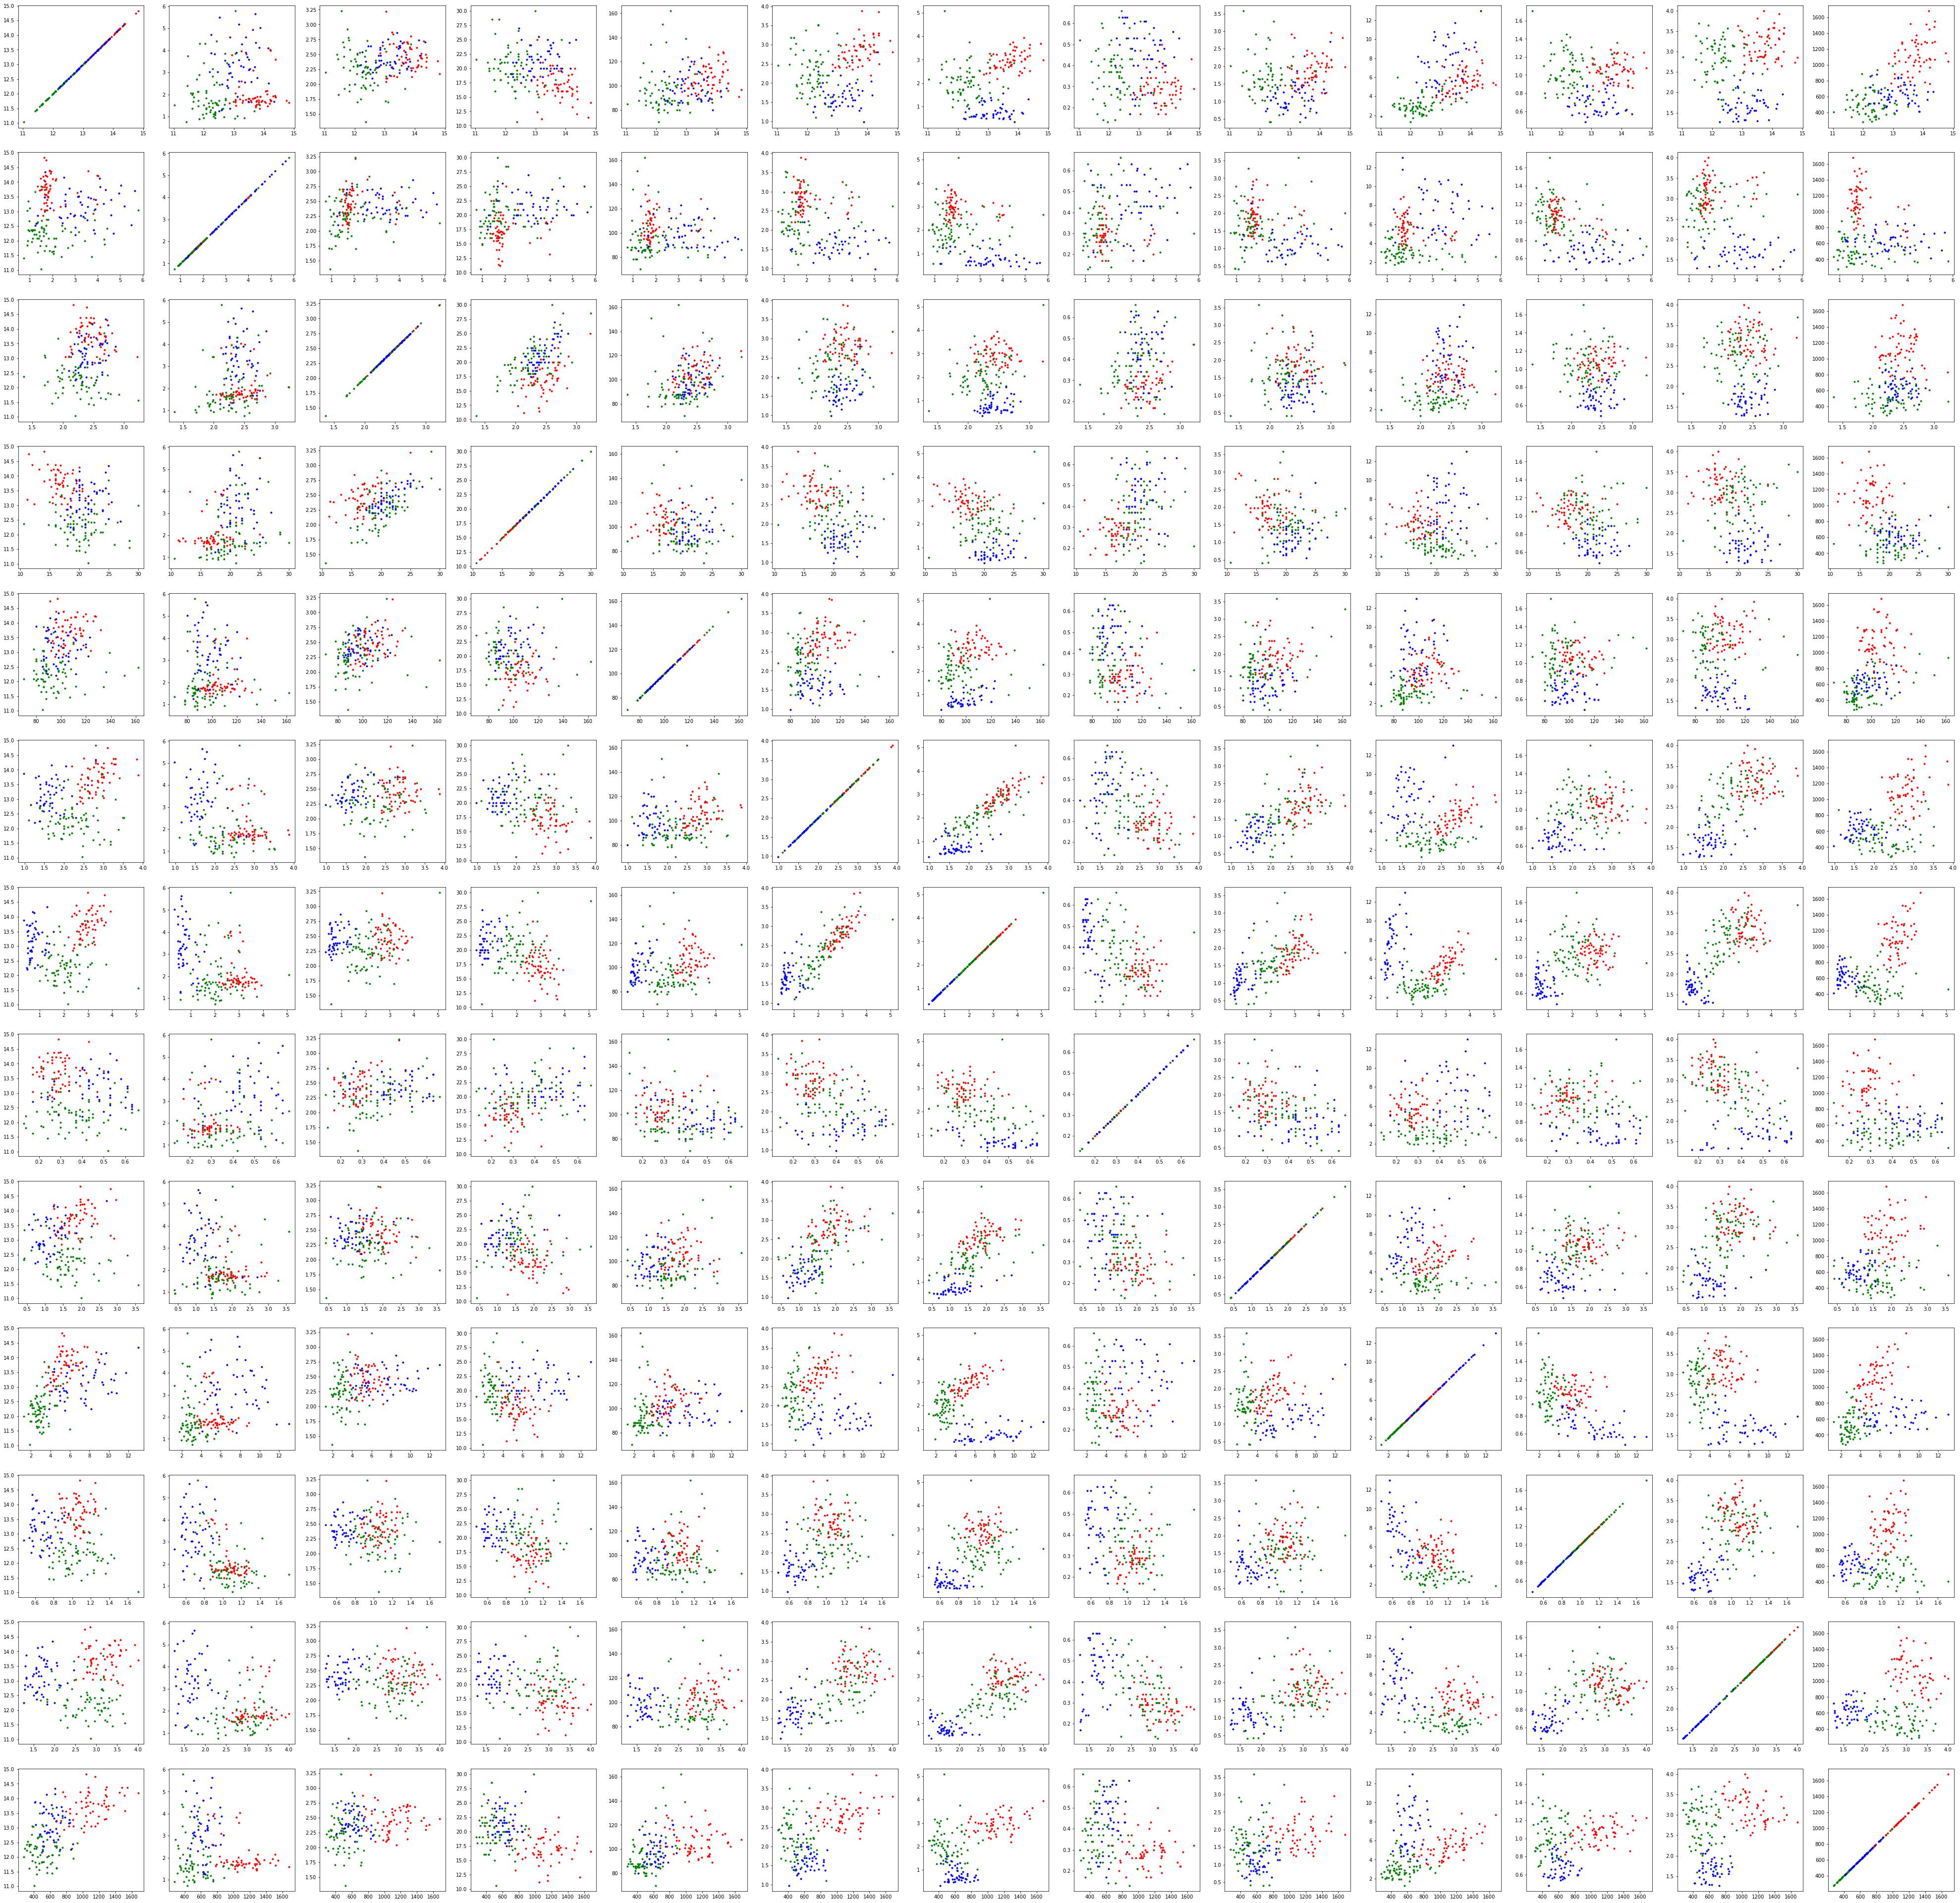

In [13]:
from pylab import *

figure(figsize=(70,70))

for f in range(0,13):
    for g in range(0,13):
        subplot(13,13,f*13+g+1)
        puttogether(f,g)

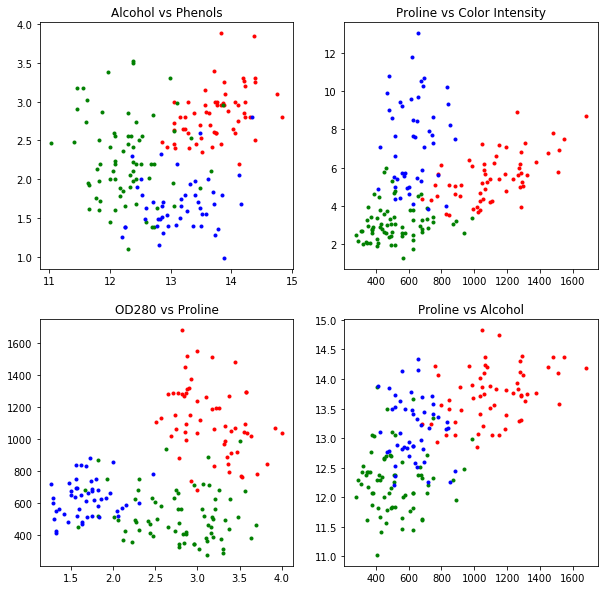

In [14]:
fig = plt.figure();



figure(figsize=(10,10));

subplot(2,2,1).axes.set_title('Alcohol vs Phenols');
puttogether(0,5);

subplot(2,2,2).axes.set_title('Proline vs Color Intensity');
puttogether(12,9);
subplot(2,2,3).axes.set_title('OD280 vs Proline');
puttogether(11,12);
subplot(2,2,4).axes.set_title('Proline vs Alcohol');
puttogether(12,0);

In [15]:
#pa.tools.plotting.scatter_matrix(data, alpha=0.2, figsize=(80,80));

In [16]:
def f(a,b,c,title):
    fig = py.figure(1, figsize=(6, 4))
    ax = Axes3D(fig, elev=-150, azim=110)
    ax.scatter(X[y==0, a], X[y==0, b], X[y==0, c], c='r')
    ax.scatter(X[y==1, a], X[y==1, b], X[y==1, c], c='g')
    ax.scatter(X[y==2, a], X[y==2, b], X[y==2, c], c='b')
    return py.show()


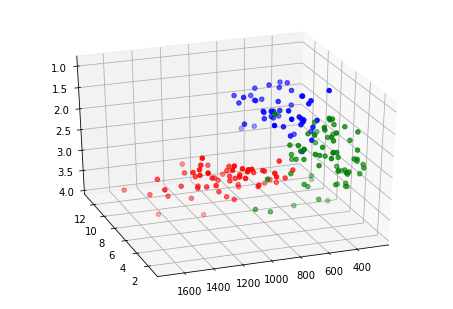

In [17]:
f(12,9,5, 'Proline, Color Intesity, and Phenols')
#praline colorintensity and phenols

# Data processing

We will add new columns to the data set that by combining products of the columns.  Included are the squares as well.

In [18]:
for z in range(0,13):
    for w in range(z,13):
        XNew = X[:,[z]]*X[:,[w]]
        X = np.append(X,XNew, axis=1)

In [19]:
print(X)
X.shape

[[  1.42300000e+01   1.71000000e+00   2.43000000e+00 ...,   1.53664000e+01
    4.17480000e+03   1.13422500e+06]
 [  1.32000000e+01   1.78000000e+00   2.14000000e+00 ...,   1.15600000e+01
    3.57000000e+03   1.10250000e+06]
 [  1.31600000e+01   2.36000000e+00   2.67000000e+00 ...,   1.00489000e+01
    3.75645000e+03   1.40422500e+06]
 ..., 
 [  1.32700000e+01   4.28000000e+00   2.26000000e+00 ...,   2.43360000e+00
    1.30260000e+03   6.97225000e+05]
 [  1.31700000e+01   2.59000000e+00   2.37000000e+00 ...,   2.62440000e+00
    1.36080000e+03   7.05600000e+05]
 [  1.41300000e+01   4.10000000e+00   2.74000000e+00 ...,   2.56000000e+00
    8.96000000e+02   3.13600000e+05]]


(178, 104)

We will transform the data in two ways with both a z-transform and a min-max transform

In [20]:
from sklearn import preprocessing

#Z-Transformed Data
Xz=preprocessing.scale(X)

#Min-Max Transformed data
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

In [21]:
print(X)
print(Xz)

[[ 0.84210526  0.1916996   0.57219251 ...,  0.95596055  0.79552267
   0.38502599]
 [ 0.57105263  0.2055336   0.4171123  ...,  0.6913902   0.6627178
   0.3734691 ]
 [ 0.56052632  0.3201581   0.70053476 ...,  0.58635861  0.70365938
   0.48338249]
 ..., 
 [ 0.58947368  0.69960474  0.48128342 ...,  0.05704416  0.1648313
   0.22583417]
 [ 0.56315789  0.36561265  0.54010695 ...,  0.07030604  0.17761114
   0.22888505]
 [ 0.81578947  0.66403162  0.73796791 ...,  0.06582981  0.07554814
   0.08608598]]
[[ 1.51861254 -0.5622498   0.23205254 ...,  2.25062076  1.84145299
   0.86193344]
 [ 0.24628963 -0.49941338 -0.82799632 ...,  1.18566526  1.32455753
   0.80469863]
 [ 0.19687903  0.02123125  1.10933436 ...,  0.76288935  1.48390799
   1.34903821]
 ..., 
 [ 0.33275817  1.74474449 -0.38935541 ..., -1.36772109 -0.61328765
   0.07354535]
 [ 0.20923168  0.22769377  0.01273209 ..., -1.31433902 -0.56354672
   0.08865462]
 [ 1.39508604  1.58316512  1.36520822 ..., -1.33235687 -0.96079045
  -0.61854934]]


In [22]:
#data.groupby("Wine Class", axis=0).describe()

##  Principle Component Analysis (PCA)

Here will we take the PCA of the new larger data file X.  This reduces the dimensionality.

[ 0.41694002  0.17837536  0.09353111  0.0825387   0.05253685  0.04115444
  0.03240693  0.02121519  0.02063415  0.01691755  0.01119706  0.00981571
  0.00762358  0.00266138  0.00189119  0.00119839  0.00091157  0.00084292
  0.00077774  0.00065249]


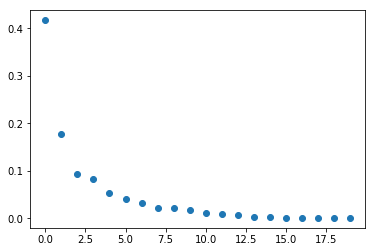

In [23]:
from sklearn.decomposition import PCA


pca = PCA(n_components=20)
XPCA = pca.fit_transform(X)
py.plot(pca.explained_variance_ratio_,'o');


print(pca.explained_variance_ratio_)


By observing the Skree plot we notice that the PCA has a knee somewhere near 2 and 4.  We look at the PCA plots for the first two and three variables.

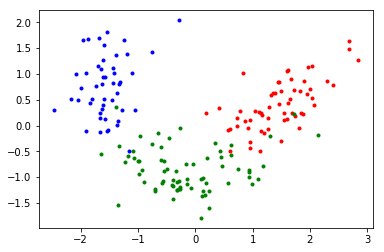

In [24]:
py.plot(XPCA[y==0,0],XPCA[y==0,1],'r.')
py.plot(XPCA[y==1,0],XPCA[y==1,1],'g.')
py.plot(XPCA[y==2,0],XPCA[y==2,1],'b.');

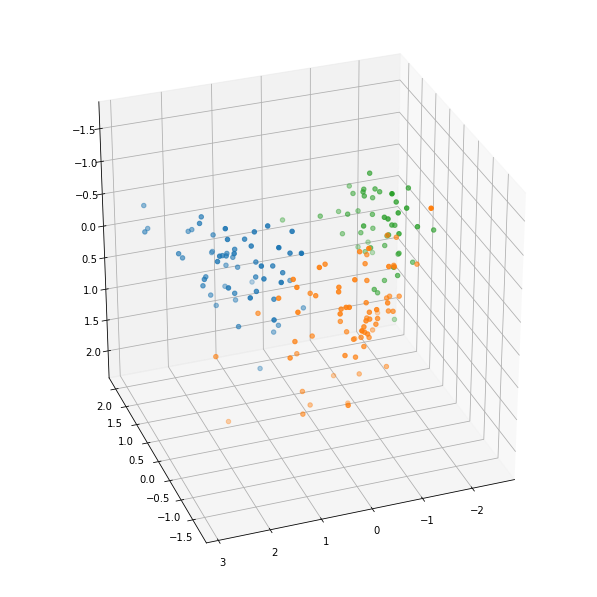

In [25]:
    fig = py.figure(1, figsize=(8, 8))
    ax = Axes3D(fig, elev=-150, azim=110)
    ax.scatter(XPCA[y==0, 0], XPCA[y==0, 1], XPCA[y==0, 2], 'r.')
    ax.scatter(XPCA[y==1, 0], XPCA[y==1, 1], XPCA[y==1, 2], 'g.')
    ax.scatter(XPCA[y==2, 0], XPCA[y==2, 1], XPCA[y==2, 2], 'b.');

## K-Nearest Neighbors.

Below we present the options for the KNeighbors function.

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

n_neighbors : int, optional (default = 5)
Number of neighbors to use by default for k_neighbors queries.

weights : str or callable, optional (default = ‘uniform’)
weight function used in prediction. Possible values:
‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
[callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.

metric : string or DistanceMetric object (default = ‘minkowski’)
the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. See the documentation of the DistanceMetric class for a list of available metrics. 

p : integer, optional (default = 2)
Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

metric_params : dict, optional (default = None)
Additional keyword arguments for the metric function.

In [26]:
# Import the K-NN solver
from sklearn import neighbors

This first program will create will look at two of the values and interpret the test.

In [27]:
# This is the one complicated bit of code in the whole demo.  There is no need to modify it, but please feel free if you want!
def runTest(clf,X,y,trainingPercent=0.66):
    # A little cheat to make the pictures consistent
    #np.random.seed(123)
    
    # If there is one thing that I want to harp on, it is the difference
    # between testing and training errors!  So, here we create a training
    # set on which we computer the parameters of our algorithm, and a 
    # testing set for seeing how well we generalize (and work on real 
    # world problems).
    perm = np.random.permutation(len(y))
    n = X.shape[0]
    trainSize = int(trainingPercent*n)
    Xtrain = X[perm[:trainSize],0:2]
    Xtest = X[perm[trainSize:],0:2]

    yHat = y
    yHattrain = yHat[perm[:trainSize]]
    yHattest = yHat[perm[trainSize:]]

    # Run the calculation!
    clf.fit(Xtrain, yHattrain)
    
    # step size in the mesh for plotting the decision boundary.
    h = .02  
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    py.figure(1, figsize=(8, 6))
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    py.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    py.scatter(Xtrain[:, 0], Xtrain[:, 1], c=yHattrain, cmap=cmap_bold,marker='o')
    py.scatter(Xtest[:, 0], Xtest[:, 1], c=yHattest, cmap=cmap_bold,marker='+')
    py.xlim(xx.min(), xx.max())
    py.ylim(yy.min(), yy.max())
    py.show()

    # Print out some metrics
    print('training score',clf.score(Xtrain,yHattrain))
    print('testing score',clf.score(Xtest,yHattest))

This test will look at a four dimensional projection but cannot provide a graphical representation.

In [28]:
# This is the one complicated bit of code in the whole demo.  There is no need to modify it, but please feel free if you want!
def runTest1(clf,X,y,trainingPercent=0.66):
    # A little cheat to make the pictures consistent
    #np.random.seed(123)
    
    # If there is one thing that I want to harp on, it is the difference
    # between testing and training errors!  So, here we create a training
    # set on which we computer the parameters of our algorithm, and a 
    # testing set for seeing how well we generalize (and work on real 
    # world problems).
    perm = np.random.permutation(len(y))
    n = X.shape[0]
    trainSize = int(trainingPercent*n)
    Xtrain = X[perm[:trainSize],0:4]
    Xtest = X[perm[trainSize:],0:4]

    yHat = y
    yHattrain = yHat[perm[:trainSize]]
    yHattest = yHat[perm[trainSize:]]

    # Run the calculation!
    clf.fit(Xtrain, yHattrain)
    
    # step size in the mesh for plotting the decision boundary.
    #h = .02  
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    #x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    #y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             #np.arange(y_min, y_max, h))
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    #Z = Z.reshape(xx.shape)

    #py.figure(1, figsize=(8, 6))
    #cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    #cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    #py.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    #py.scatter(Xtrain[:, 0], Xtrain[:, 1], c=yHattrain, cmap=cmap_bold,marker='o')
    #py.scatter(Xtest[:, 0], Xtest[:, 1], c=yHattest, cmap=cmap_bold,marker='+')
    #py.xlim(xx.min(), xx.max())
    #py.ylim(yy.min(), yy.max())
    #py.show()

    # Print out some metrics
    print('training score',clf.score(Xtrain,yHattrain))
    print('testing score',clf.score(Xtest,yHattest))

This test will run a PCA on the random training set.  You can set the accuracy of the PCA by changing comps which is initially set to 20.

In [29]:
# This is the one complicated bit of code in the whole demo.  There is no need to modify it, but please feel free if you want!
def runTest2(clf,X,y,comps=20,trainingPercent=0.66):
    # A little cheat to make the pictures consistent
    #np.random.seed(123)
    
    # If there is one thing that I want to harp on, it is the difference
    # between testing and training errors!  So, here we create a training
    # set on which we computer the parameters of our algorithm, and a 
    # testing set for seeing how well we generalize (and work on real 
    # world problems).
        
    
    perm = np.random.permutation(len(y))
    n = X.shape[0]
    trainSize = int(trainingPercent*n)
    Xtrain = X[perm[:trainSize],:]
    Xtest = X[perm[trainSize:],:]

    yHat = y
    yHattrain = yHat[perm[:trainSize]]
    yHattest = yHat[perm[trainSize:]]

    #Run a PCA on the training set
    
    pca = PCA(n_components=comps)
    Xtrain = pca.fit_transform(Xtrain)
    Xtest = pca.transform(Xtest)
    py.plot(pca.explained_variance_ratio_,'o');
    
    # Run the calculation!
    clf.fit(Xtrain, yHattrain)
    
    # step size in the mesh for plotting the decision boundary.
    #h = .02  
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    #x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    #y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             #np.arange(y_min, y_max, h))
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    #Z = Z.reshape(xx.shape)

    #py.figure(1, figsize=(8, 6))
    #cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    #cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    #py.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    #py.scatter(Xtrain[:, 0], Xtrain[:, 1], c=yHattrain, cmap=cmap_bold,marker='o')
    #py.scatter(Xtest[:, 0], Xtest[:, 1], c=yHattest, cmap=cmap_bold,marker='+')
    #py.xlim(xx.min(), xx.max())
    #py.ylim(yy.min(), yy.max())
    #py.show()

    # Print out some metrics
    global trainscore
    global testscore
    trainscore = clf.score(Xtrain,yHattrain)
    testscore = clf.score(Xtest,yHattest)
    return [trainscore, testscore]

## Basic tests

Thinking about what must have to been going on, we decided to try a different projection of the data.

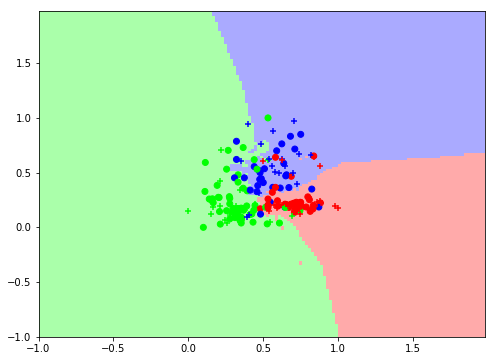

training score 0.820512820513
testing score 0.819672131148


In [30]:
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
runTest(clf,X[:,[0,1]],y)

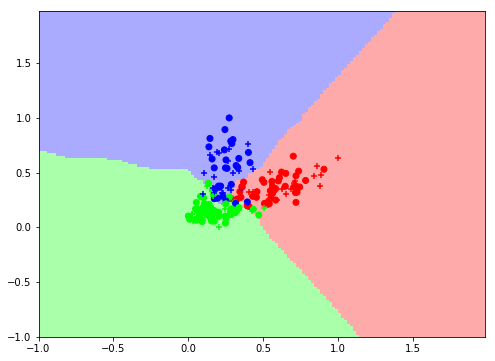

training score 0.905982905983
testing score 0.868852459016


In [31]:
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
runTest(clf,X[:,[12,9]],y)

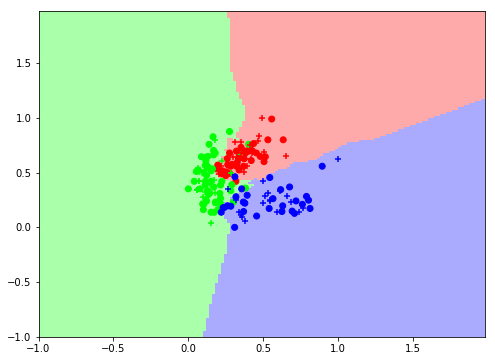

training score 0.948717948718
testing score 0.934426229508


In [32]:
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
runTest(clf,X[:,[9,5]],y)

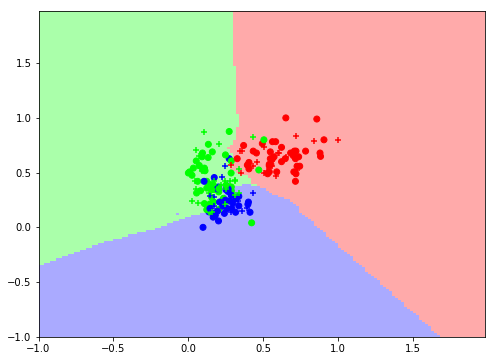

training score 0.880341880342
testing score 0.770491803279


In [33]:
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
runTest(clf,X[:,[12,5]],y)

Getting just a bit fancier, we actually do PCA!!

What happens if we reduce the training data by a lot?

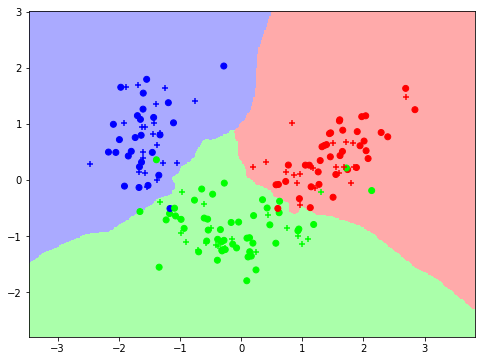

training score 0.957264957265
testing score 0.983606557377


In [34]:
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
runTest(clf,XPCA[:,[0,1]],y)

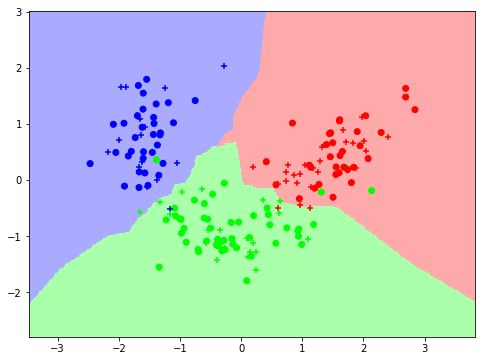

training score 0.965811965812
testing score 0.934426229508


In [35]:
clf = neighbors.KNeighborsClassifier(n_neighbors=3)
runTest(clf,XPCA[:,[0,1]],y)

In [36]:
z=[]
for k in range (0,10):
    z = np.append(z,[k])
    
print(z)
mean(z)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.]


4.5

In [37]:
for k in range (1,11):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    print(k)
    runTest1(clf,XPCA[:,[0,1,2,3]],y)
    

1
training score 1.0
testing score 0.901639344262
2
training score 0.948717948718
testing score 0.868852459016
3
training score 0.982905982906
testing score 0.901639344262
4
training score 0.957264957265
testing score 0.934426229508
5
training score 0.957264957265
testing score 0.967213114754
6
training score 0.940170940171
testing score 0.901639344262
7
training score 0.974358974359
testing score 0.967213114754
8
training score 0.948717948718
testing score 0.934426229508
9
training score 0.965811965812
testing score 0.950819672131
10
training score 0.965811965812
testing score 0.934426229508


In [38]:
for k in range (1,11):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    print(k)
    runTest1(clf,XPCA[:,[0,1,2]],y)

1
training score 1.0
testing score 0.967213114754
2
training score 0.974358974359
testing score 0.983606557377
3
training score 0.974358974359
testing score 0.950819672131
4
training score 0.974358974359
testing score 0.967213114754
5
training score 0.965811965812
testing score 0.950819672131
6
training score 0.940170940171
testing score 0.967213114754
7
training score 0.965811965812
testing score 0.983606557377
8
training score 0.974358974359
testing score 0.934426229508
9
training score 0.965811965812
testing score 0.934426229508
10
training score 0.965811965812
testing score 0.950819672131


In [39]:
for k in range (1,11):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    print(k)
    runTest1(clf,XPCA[:,[0,1]],y)

1
training score 1.0
testing score 0.950819672131
2
training score 0.965811965812
testing score 0.934426229508
3
training score 0.957264957265
testing score 0.983606557377
4
training score 0.974358974359
testing score 0.950819672131
5
training score 0.957264957265
testing score 0.967213114754
6
training score 0.965811965812
testing score 0.934426229508
7
training score 0.957264957265
testing score 0.950819672131
8
training score 0.965811965812
testing score 0.918032786885
9
training score 0.957264957265
testing score 0.934426229508
10
training score 0.940170940171
testing score 0.983606557377


1
2
3
4
5
6
7
8
9
10


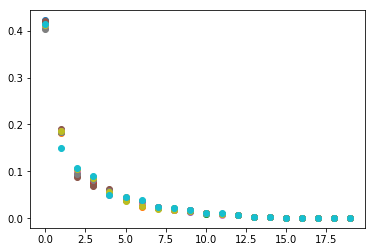

In [40]:
for k in range (1,11):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    print(k)
    runTest2(clf,X,y)

1
2
3
4
5
6
7
8
9
10


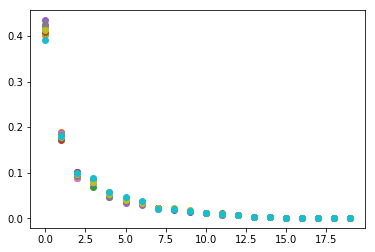

In [41]:
for k in range (1,11):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    print(k)
    runTest2(clf,X,y,trainingPercent=.8)

1
2
3
4
5
6
7
8
9
10


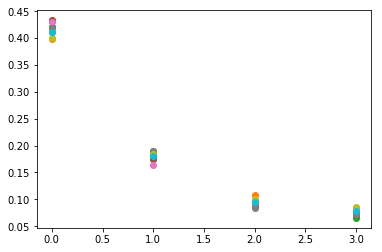

In [42]:
for k in range (1,11):
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    print(k)
    runTest2(clf,X,y,comps=4,trainingPercent=.66)

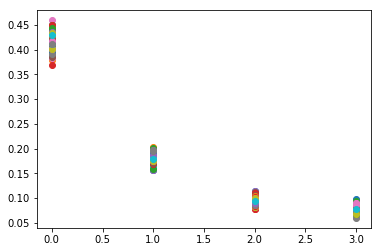

In [43]:
ztest = []
zratio = []

for k in range (1,20):
    for j in range (0,10):
        clf = neighbors.KNeighborsClassifier(n_neighbors=k)
        runTest2(clf,X,y,comps=4,trainingPercent=.66);
        ztest = np.append(ztest,[testscore])
        zratio = np.append(zratio,[trainscore/testscore])

In [44]:
meandata = []

for k in range (0,19):
    meandata = np.append(meandata,[[k+1,mean(ztest[10*k:9+k*10]),mean(zratio[10*k:9+k*10])]])
    
print(meandata)



[  1.           0.90346084   1.10901785   2.           0.91621129
   1.05112976   3.           0.93442623   1.05017469   4.           0.9435337
   1.00799033   5.           0.9435337    1.0263515    6.           0.92714026
   1.02988584   7.           0.9417122    1.01924541   8.           0.92349727
   1.0340557    9.           0.93260474   1.0313937   10.           0.92531876
   1.03893062  11.           0.94899818   1.01327239  12.           0.95081967
   0.99857191  13.           0.9435337    1.01738699  14.           0.93806922
   1.02305577  15.           0.9435337    1.01504075  16.           0.94717668
   1.00578413  17.           0.9435337    1.01985911  18.           0.93624772
   1.02309625  19.           0.94717668   1.01738516]


## Future Work
In the future, we would like to use a mathematical decision to choose the number of neighbors K.  We have considered calculating more descriptive statistics on the testing scores for each value of K using different random test sets.  

We also would like to use z-scores to transform the original data, and see if this gives different results than scaling the data between 0 and 1.